<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CognoRise-InfoTech-TASK-3-DIGIT-RECOGNISER-AI-/blob/main/DIGIT_RECOGNISER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Load the dataset from .npy files
train_images_npy = np.load('/content/train_images.npy')
train_labels_npy = np.load('/content/train_labels.npy')
test_images_npy = np.load('/content/test_images.npy')
test_labels_npy = np.load('/content/test_labels.npy')

In [ ]:
# Load the dataset from .csv files
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
# Extract images and labels from CSV files
train_images_csv = train_df.iloc[:, 1:].values
train_labels_csv = train_df.iloc[:, 0].values
test_images_csv = test_df.iloc[:, 1:].values
test_labels_csv = test_df.iloc[:, 0].values

In [ ]:
# Reshape and normalize CSV images (28x28, normalized)
train_images_csv = train_images_csv.reshape(-1, 28, 28, 1) / 255.0
test_images_csv = test_images_csv.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
# Check the shape of npy files and reshape if necessary
if len(train_images_npy.shape) == 3:  # Shape is (num_samples, height, width)
    train_images_npy = train_images_npy.reshape(-1, 28, 28, 1)
if len(test_images_npy.shape) == 3:
    test_images_npy = test_images_npy.reshape(-1, 28, 28, 1)

In [ ]:
# Normalize npy images if not already normalized
train_images_npy = train_images_npy / 255.0
test_images_npy = test_images_npy / 255.0

In [ ]:
# Combine .csv and .npy datasets
train_images_combined = np.concatenate((train_images_npy, train_images_csv), axis=0)
train_labels_combined = np.concatenate((train_labels_npy, train_labels_csv), axis=0)
test_images_combined = np.concatenate((test_images_npy, test_images_csv), axis=0)
test_labels_combined = np.concatenate((test_labels_npy, test_labels_csv), axis=0)

In [ ]:
# One-hot encode labels after combining
train_labels_combined = to_categorical(train_labels_combined, num_classes=10)
test_labels_combined = to_categorical(test_labels_combined, num_classes=10)

In [ ]:
# Check combined shapes
print("Combined train images shape:", train_images_combined.shape)
print("Combined train labels shape:", train_labels_combined.shape)
print("Combined test images shape:", test_images_combined.shape)
print("Combined test labels shape:", test_labels_combined.shape)

Combined train images shape: (109663, 28, 28, 1)
Combined train labels shape: (109663, 10)
Combined test images shape: (20000, 28, 28, 1)
Combined test labels shape: (20000, 10)


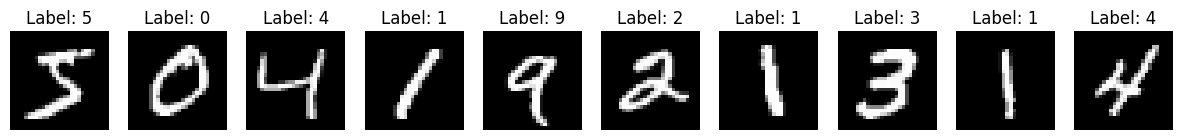

In [ ]:
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {np.argmax(labels[i])}')
        plt.axis('off')
    plt.show()

# Plot samples from combined training data
plot_sample_images(train_images_combined[:10], train_labels_combined[:10])


<ipython-input-28-bc5089f7a3e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=label_counts, palette='viridis')


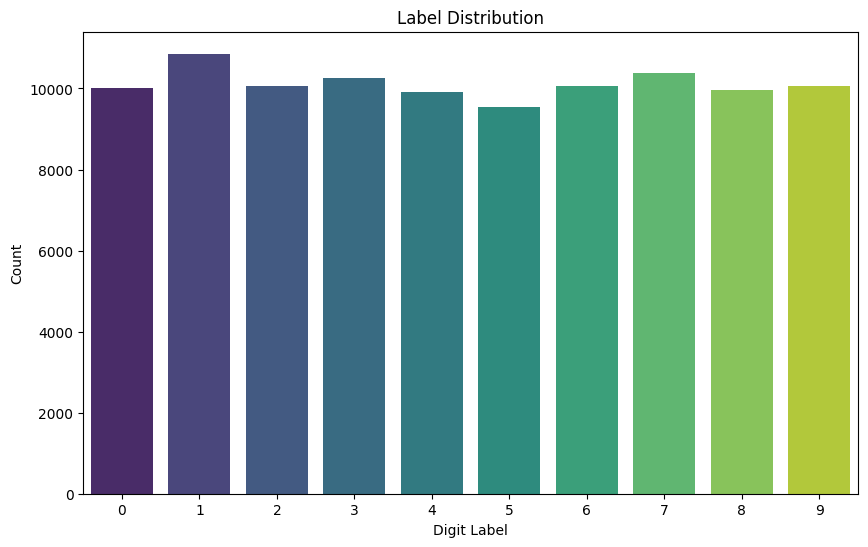

In [ ]:
def plot_label_distribution(labels, title='Label Distribution'):
    label_counts = np.sum(labels, axis=0)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=np.arange(10), y=label_counts, palette='viridis')
    plt.xlabel('Digit Label')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(ticks=np.arange(10), labels=np.arange(10))
    plt.show()

# Plot label distribution for training data
plot_label_distribution(train_labels_combined)


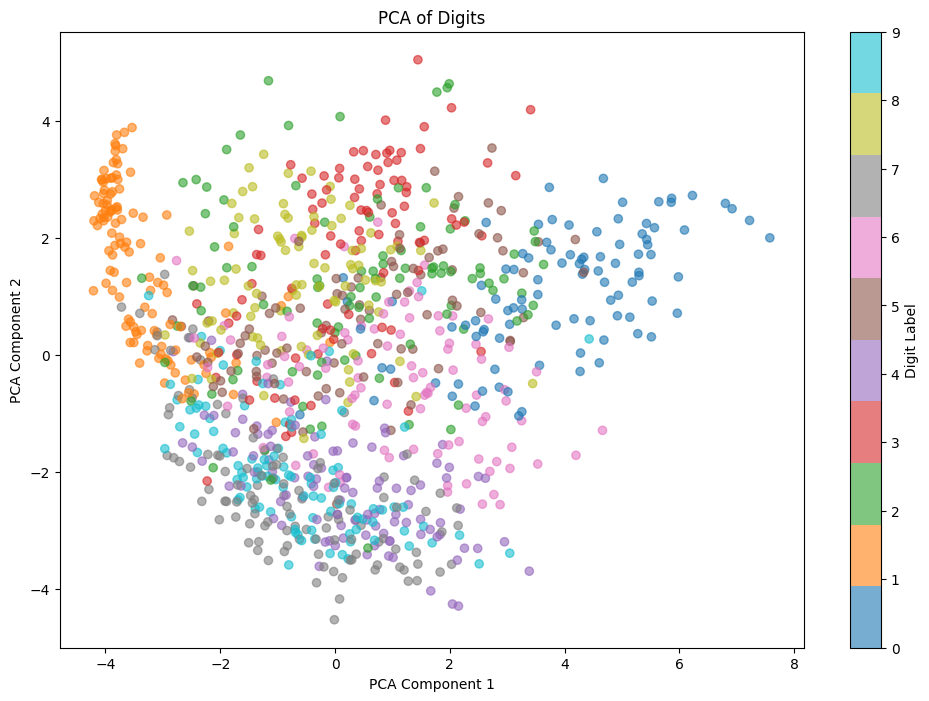

In [ ]:
from sklearn.decomposition import PCA

def plot_pca_2d(images, labels, num_samples=1000):
    pca = PCA(n_components=2)
    images_2d = pca.fit_transform(images.reshape(-1, 28 * 28))

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(images_2d[:, 0], images_2d[:, 1], c=np.argmax(labels, axis=1), cmap='tab10', alpha=0.6)
    plt.colorbar(scatter, ticks=range(10), label='Digit Label')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA of Digits')
    plt.show()

# Plot PCA for a subset of training data
plot_pca_2d(train_images_combined[:1000], train_labels_combined[:1000])


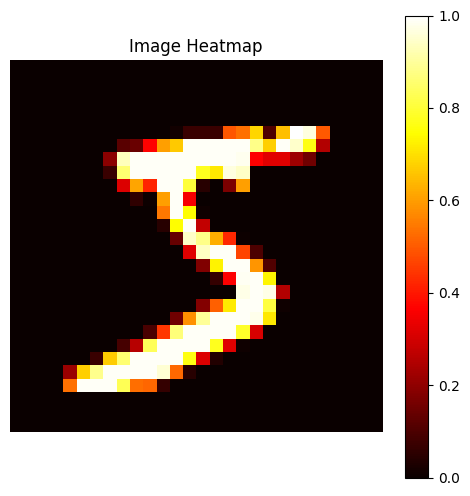

In [ ]:
def plot_image_heatmap(image, title='Image Heatmap'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image.reshape(28, 28), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot heatmap for a sample image
plot_image_heatmap(train_images_combined[0])


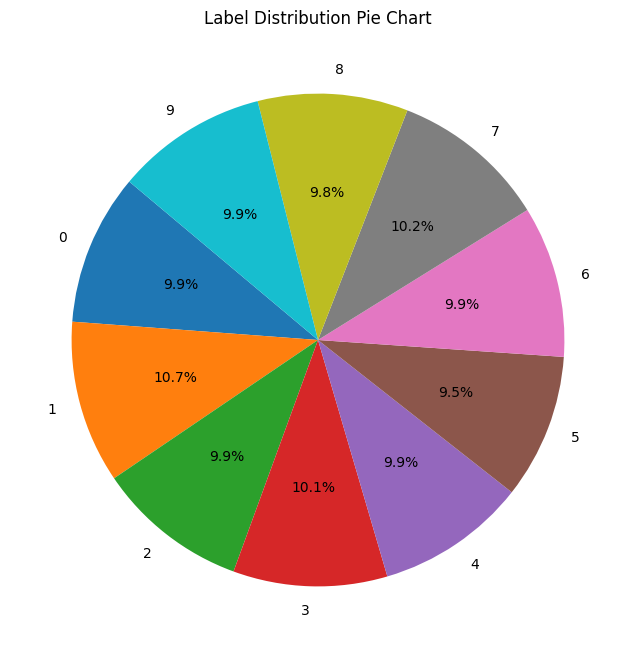

In [ ]:
def plot_label_pie_chart(labels, title='Label Distribution Pie Chart'):
    label_counts = np.sum(labels, axis=0)
    plt.figure(figsize=(8, 8))
    plt.pie(label_counts, labels=np.arange(10), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
    plt.title(title)
    plt.show()

# Plot pie chart for training data labels
plot_label_pie_chart(train_labels_combined)


<ipython-input-18-bc9858e5d228>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=df.columns[0], data=df, palette='tab10')


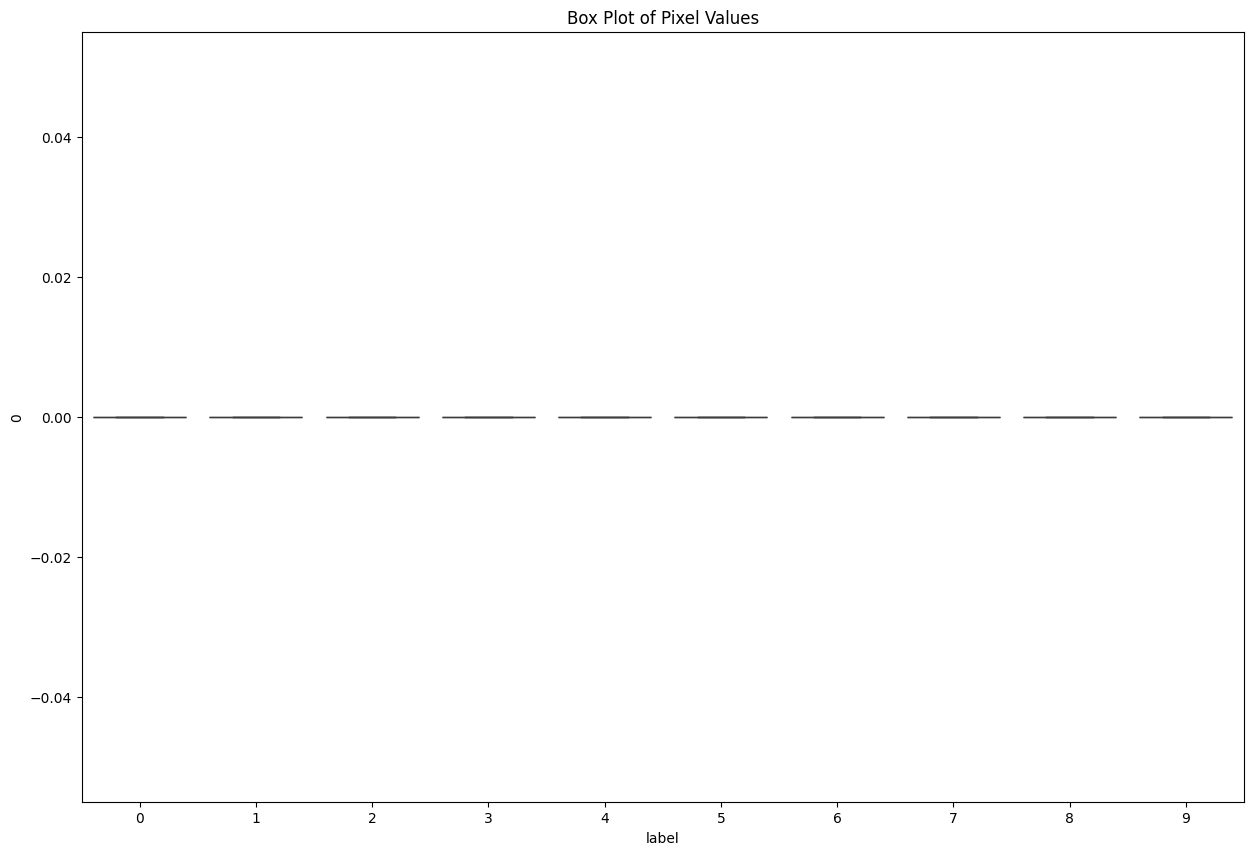

In [ ]:
def plot_box_plot(images, labels, title='Box Plot of Pixel Values'):
    df = pd.DataFrame(images.reshape(-1, 28 * 28).astype(np.float32))
    df['label'] = np.argmax(labels, axis=1)

    plt.figure(figsize=(15, 10))
    sns.boxplot(x='label', y=df.columns[0], data=df, palette='tab10')
    plt.title(title)
    plt.show()

# Plot box plot for training data
plot_box_plot(train_images_combined[:1000], train_labels_combined[:1000])

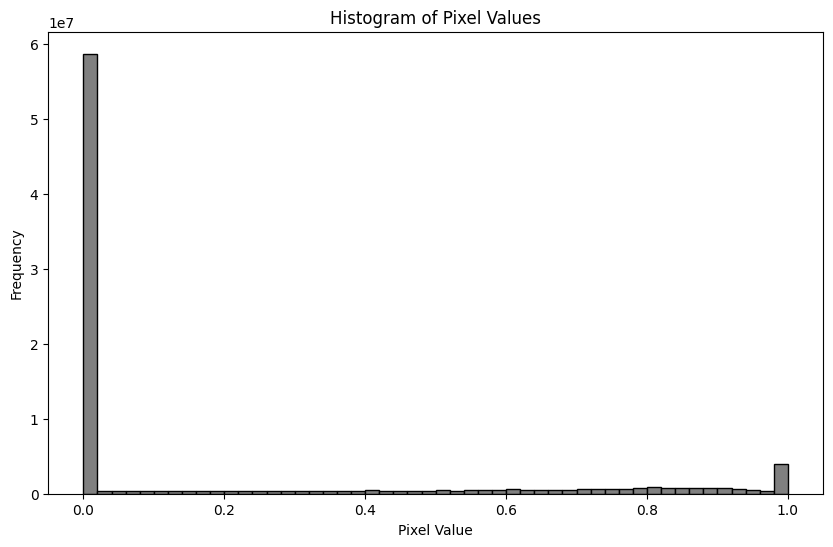

In [ ]:
def plot_pixel_value_histogram(images, title='Histogram of Pixel Values'):
    all_pixels = images.reshape(-1)
    plt.figure(figsize=(10, 6))
    plt.hist(all_pixels, bins=50, color='gray', edgecolor='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot histogram for training images
plot_pixel_value_histogram(train_images_combined)


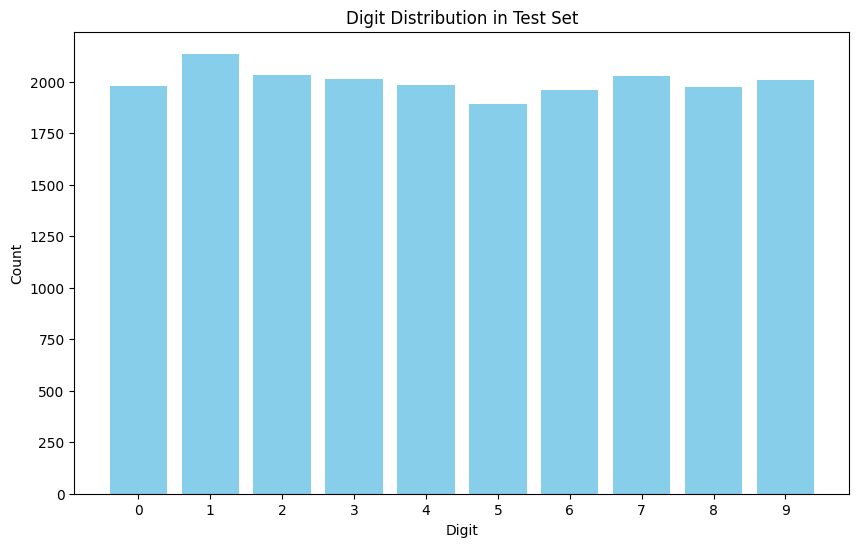

In [ ]:
def plot_digit_distribution(images, labels, title='Digit Distribution in Test Set'):
    digit_counts = np.sum(labels, axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(10), digit_counts, color='skyblue')
    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(np.arange(10))
    plt.show()

# Plot distribution for test labels
plot_digit_distribution(test_images_combined, test_labels_combined)


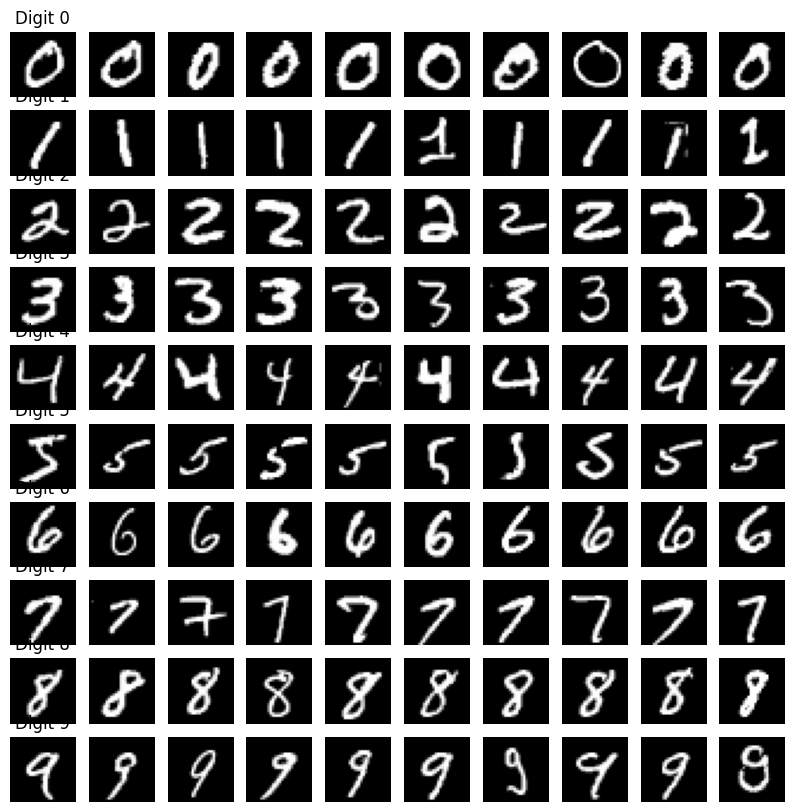

In [ ]:
def plot_image_grid(images, labels, num_per_class=10):
    plt.figure(figsize=(10, 10))
    for digit in range(10):
        indices = np.where(np.argmax(labels, axis=1) == digit)[0]
        for i in range(num_per_class):
            plt.subplot(10, num_per_class, digit * num_per_class + i + 1)
            plt.imshow(images[indices[i]].reshape(28, 28), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(f'Digit {digit}')
    plt.show()

# Plot grid of sample images from training set
plot_image_grid(train_images_combined, train_labels_combined)


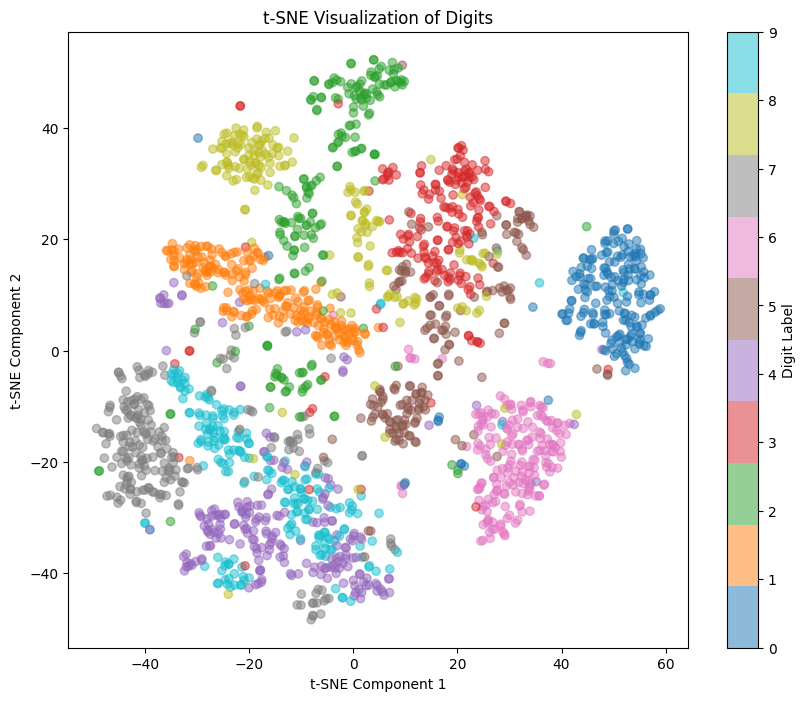

In [ ]:
from sklearn.manifold import TSNE

def plot_tsne(images, labels, num_samples=2000):
    tsne = TSNE(n_components=2, random_state=0)
    images_2d = tsne.fit_transform(images.reshape(-1, 28 * 28)[:num_samples])

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(images_2d[:, 0], images_2d[:, 1], c=np.argmax(labels[:num_samples], axis=1), cmap='tab10', alpha=0.5)
    plt.colorbar(scatter, ticks=range(10), label='Digit Label')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Visualization of Digits')
    plt.show()

# Plot t-SNE for a subset of training data
plot_tsne(train_images_combined, train_labels_combined)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images_combined, train_labels_combined,
                    validation_data=(test_images_combined, test_labels_combined),
                    epochs=10, batch_size=128)


Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 98s 112ms/step - accuracy: 0.7400 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 2/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 136s 105ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.0995 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 142s 107ms/step - accuracy: 0.1002 - loss: nan - val_accuracy: 0.0990 - val_loss: nan
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.0990 - val_loss

In [ ]:
test_loss, test_acc = model.evaluate(test_images_combined, test_labels_combined)
print(f'Test accuracy: {test_acc}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0952 - loss: nan
Test accuracy: 0.0989999994635582


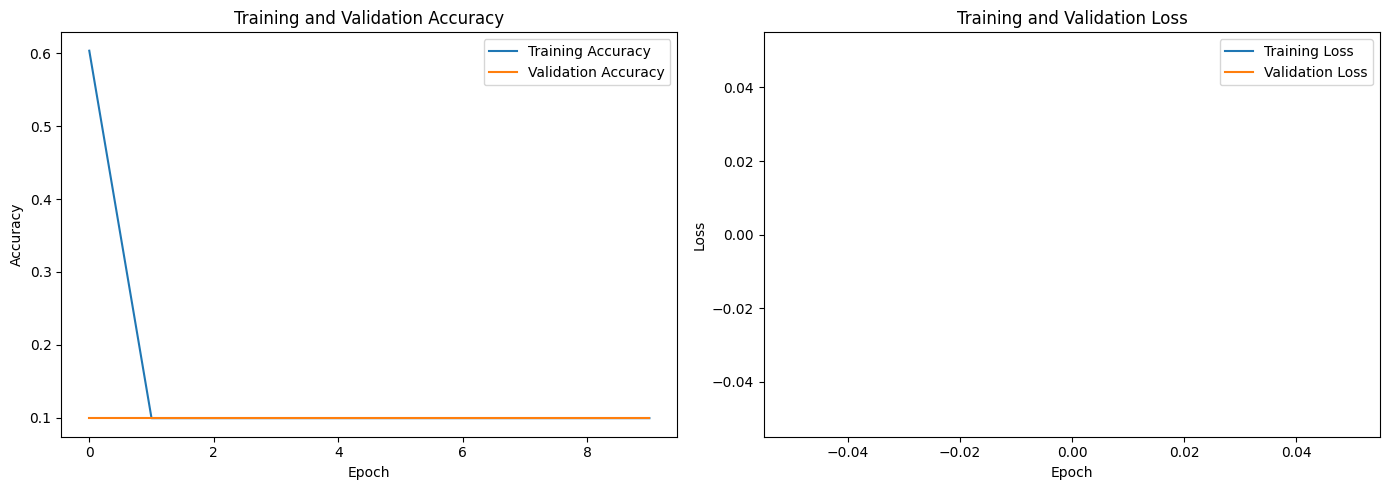

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step


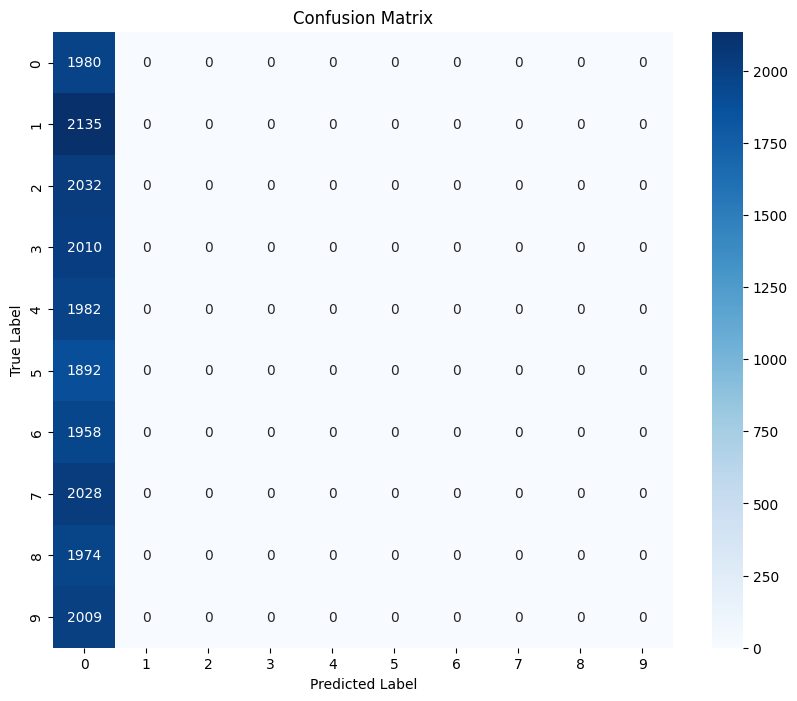

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred = np.argmax(model.predict(test_images_combined), axis=1)
y_true = np.argmax(test_labels_combined, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Check for NaN values in the dataset
print(np.isnan(train_images_flattened).sum())


413


In [ ]:
train_images_flattened = np.nan_to_num(train_images_flattened)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_images_flattened = imputer.fit_transform(train_images_flattened)


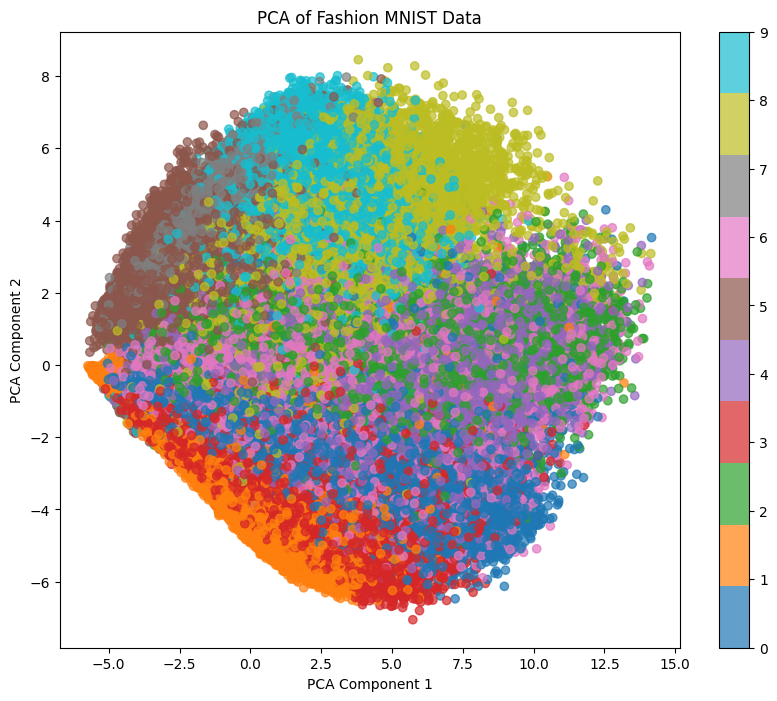

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_images_flattened)

# Plotting PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=np.argmax(train_labels_combined, axis=1), cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Fashion MNIST Data')
plt.show()


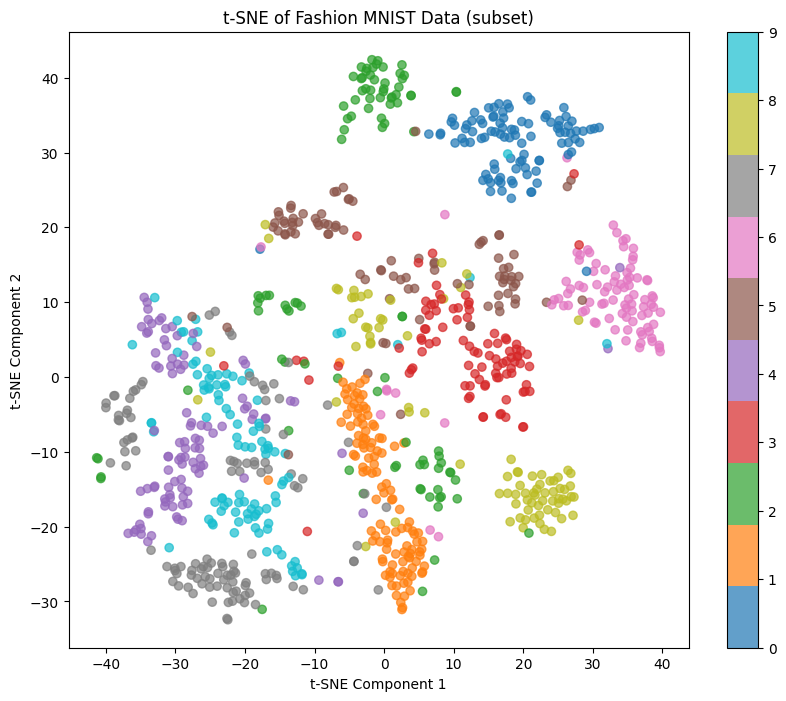

In [ ]:
# t-SNE for better clustering visualization
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(train_images_flattened[:1000])  # Using a subset for faster computation

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=np.argmax(train_labels_combined[:1000], axis=1), cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Fashion MNIST Data (subset)')
plt.show()


NaN values in y_test_binarized: 0
NaN values in y_pred_binarized: 200000


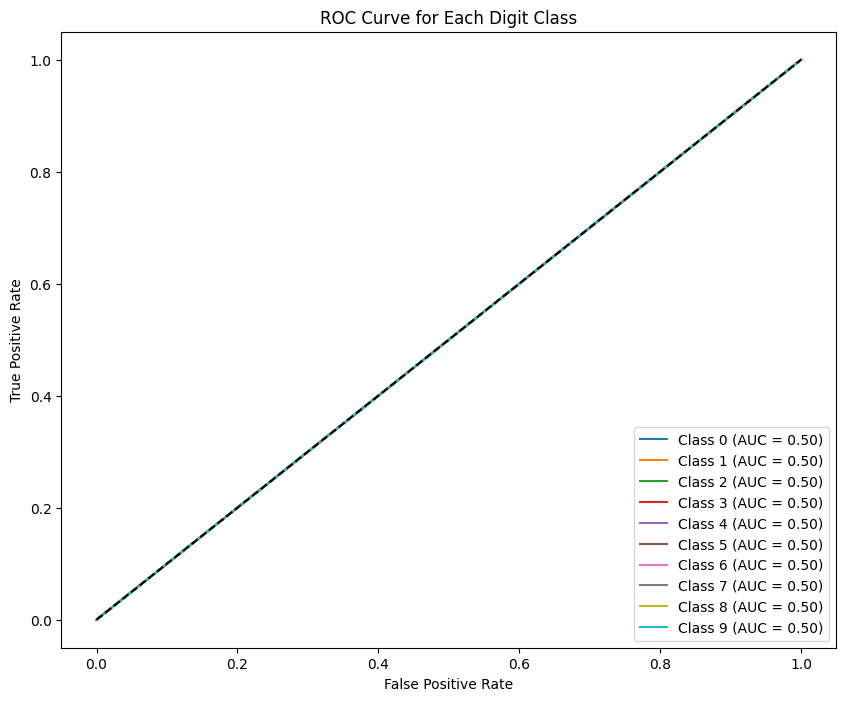

In [ ]:
# Check for NaN values in the test labels and predictions
print(f"NaN values in y_test_binarized: {np.isnan(y_test_binarized).sum()}")
print(f"NaN values in y_pred_binarized: {np.isnan(y_pred_binarized).sum()}")
# Replace NaN values with zero
y_test_binarized = np.nan_to_num(y_test_binarized)
y_pred_binarized = np.nan_to_num(y_pred_binarized)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure the labels are binarized
y_test_binarized = label_binarize(np.argmax(test_labels_combined, axis=1), classes=np.arange(10))

# Replace NaN in predictions with zero
y_pred_binarized = np.nan_to_num(y_pred_binarized)

plt.figure(figsize=(10, 8))

# Loop through each class to calculate ROC curve
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Digit Class')
plt.legend(loc='lower right')
plt.show()



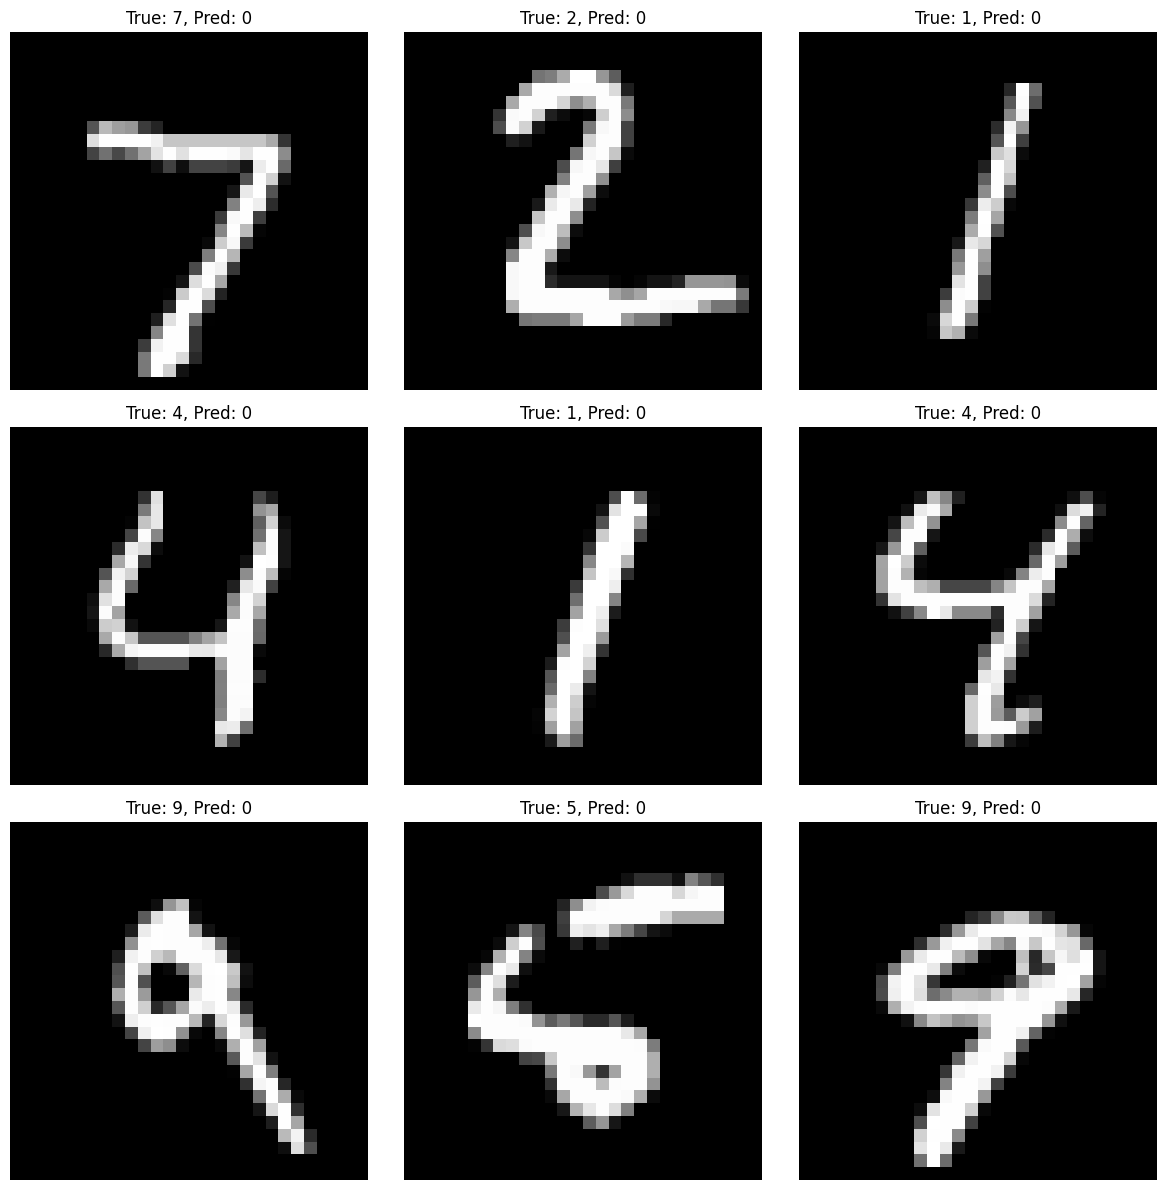

In [ ]:
misclassified_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(12, 12))
for i, index in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images_combined[index].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[index]}, Pred: {y_pred[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


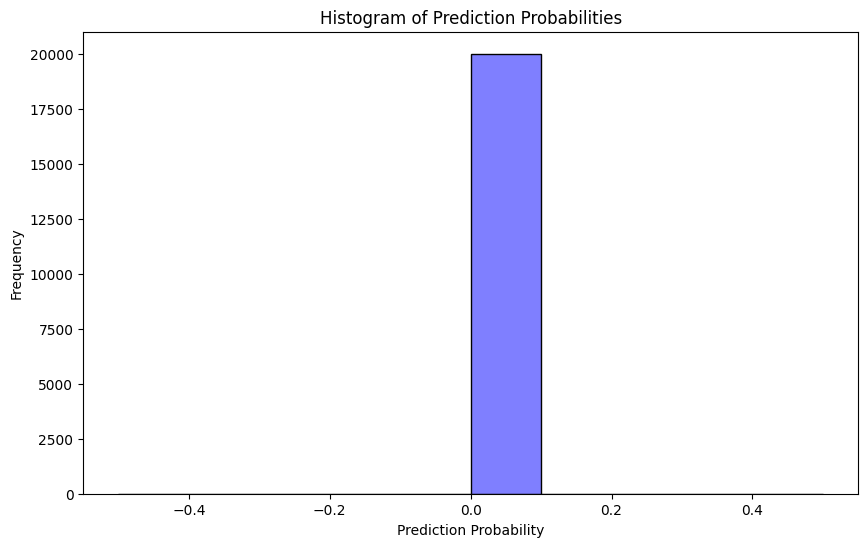

In [ ]:
import seaborn as sns

y_pred_probabilities = np.max(y_pred_binarized, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_probabilities, bins=10, kde=True, color='blue')
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.show()
